In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def clean(dataset, column_name: str): #removes NaN-values, relevant later
    cleaned_data = dataset[dataset[column_name].notna()]
    return cleaned_data

In [4]:
#requires the metadata to be in the same folder as the code
data = pd.read_csv("metadata.csv") #reading in the metadata

In [5]:
#receiving column names for data cleaning and analysis
data.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')

In [6]:
#removing the parameters that have already been examined in the original article
data = data.drop(columns = ["age", "region", "diameter_1", "diameter_2", "itch", "grew", "hurt", "changed", "bleed", "elevation", "img_id", "biopsed"])

In [7]:
nld = data.drop_duplicates("lesion_id") #removing lesion duplicates (nld = no lesion duplicates)

print(len(data)-len(nld)) 
#we've removed 657 duplicates to ensure a lesion is only represented once in the data analysis

657


In [8]:
#creating datasets for each diagnosis
mel = nld[nld["diagnostic"]=="MEL"]
nev = nld[nld["diagnostic"]=="NEV"]
ack = nld[nld["diagnostic"]=="ACK"]
sek = nld[nld["diagnostic"]=="SEK"]
bcc = nld[nld["diagnostic"]=="BCC"]
scc = nld[nld["diagnostic"]=="SCC"]
print("melanomas:", len(mel))
print("nevi:", len(nev))
print("actinic keratoses:", len(ack))
print("seborrheic keratoses:", len(sek))
print("basal cell carcinomas:", len(bcc))
print("squamous cell carcinomas:", len(scc))

melanomas: 30
nevi: 182
actinic keratoses: 550
seborrheic keratoses: 169
basal cell carcinomas: 574
squamous cell carcinomas: 136


In [9]:
#creating a function to handle true/false categories and create plots for truth value and percentages
#this could be done a lot prettier and more efficiently like later plots,
#but it was not and it is not a priority to do so since runtime is fine and it does what it needs to do
def data_analysis_plot(mel, nev, ack, sek, bcc, scc, column_name: str, plot_title: str):
    mel_cat = len(mel[mel[column_name]==True])
    mel_noncat = len(mel[mel[column_name]==False])
    nev_cat = len(nev[nev[column_name]==True])
    nev_noncat = len(nev[nev[column_name]==False])
    ack_cat = len(ack[ack[column_name]==True])
    ack_noncat = len(ack[ack[column_name]==False])
    sek_cat = len(sek[sek[column_name]==True])
    sek_noncat = len(sek[sek[column_name]==False])
    bcc_cat = len(bcc[bcc[column_name]==True])
    bcc_noncat = len(bcc[bcc[column_name]==False])
    scc_cat = len(scc[scc[column_name]==True])
    scc_noncat = len(scc[scc[column_name]==False])

    mel_unknown = len(mel) - (mel_cat + mel_noncat)
    nev_unknown = len(nev) - (nev_cat + nev_noncat)
    ack_unknown = len(ack) - (ack_cat + ack_noncat)
    sek_unknown = len(sek) - (sek_cat + sek_noncat)
    bcc_unknown = len(bcc) - (bcc_cat + bcc_noncat)
    scc_unknown = len(scc) - (scc_cat + scc_noncat)

    #calculating category percentages of each diagnosis
    ack_p = ack_cat/len(ack)*100
    scc_p = scc_cat/len(scc)*100
    bcc_p = bcc_cat/len(bcc)*100
    sek_p = sek_cat/len(sek)*100
    nev_p = nev_cat/len(nev)*100
    mel_p = mel_cat/len(mel)*100

    #calculating percentages if unknown are not included
    ack_pw = ack_cat/(len(ack)-ack_unknown)*100
    scc_pw = scc_cat/(len(scc)-scc_unknown)*100
    bcc_pw = bcc_cat/(len(bcc)-bcc_unknown)*100
    sek_pw = sek_cat/(len(sek)-sek_unknown)*100
    nev_pw = nev_cat/(len(nev)-nev_unknown)*100
    mel_pw = mel_cat/(len(mel)-mel_unknown)*100

    #plotting the result
    categories = ["ACK", "SCC", "BCC", "SEK", "NEV", "MEL"] #categories in the same order as the original article
    sub_categories = ["Y", "N", "U"] #category true? yes, no, unknown
    percentages = [ack_p, scc_p, bcc_p, sek_p, nev_p, mel_p]
    percentages_without_unknown = [ack_pw, scc_pw, bcc_pw, sek_pw, nev_pw, mel_pw]

    values = {"ACK": [ack_cat, ack_noncat, ack_unknown],
            "SCC": [scc_cat, scc_noncat, scc_unknown],
            "BCC": [bcc_cat, bcc_noncat, bcc_unknown],
            "SEK": [sek_cat, sek_noncat, sek_unknown],
            "NEV": [nev_cat, nev_noncat, nev_unknown],
            "MEL": [mel_cat, mel_noncat, mel_unknown]}    


    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

    colors = ["royalblue", "mediumblue", "lightskyblue"]

    ax1 = axes[0]
    bar_width = 0.2
    index = np.arange(len(categories))

    for i, sc in enumerate(sub_categories):
        heights = [values[s][i] for s in categories]
        ax1.bar(index + i * bar_width, heights, bar_width, label=sc, color = colors[i])

    ax1.set_xlabel("diagnosis")
    ax1.set_ylabel("counts")
    ax1.set_title(plot_title)
    ax1.set_xticks(index + bar_width)
    ax1.set_xticklabels(categories)
    ax1.legend(title = "True?")

    ax2 = axes[1]
    ax2.bar(categories, percentages, color = "lightskyblue")
    ax2.set_xlabel("diagnosis")
    ax2.set_ylabel("percentages")
    ax2.set_title("percentage true")

    ax3 = axes[2]
    ax3.bar(categories, percentages_without_unknown, color = "royalblue")
    ax3.set_xlabel("diagnosis")
    ax3.set_ylabel("percentages")
    ax3.set_title("percentage true without unknown values")

    plt.tight_layout()
    plt.show()


Smoking

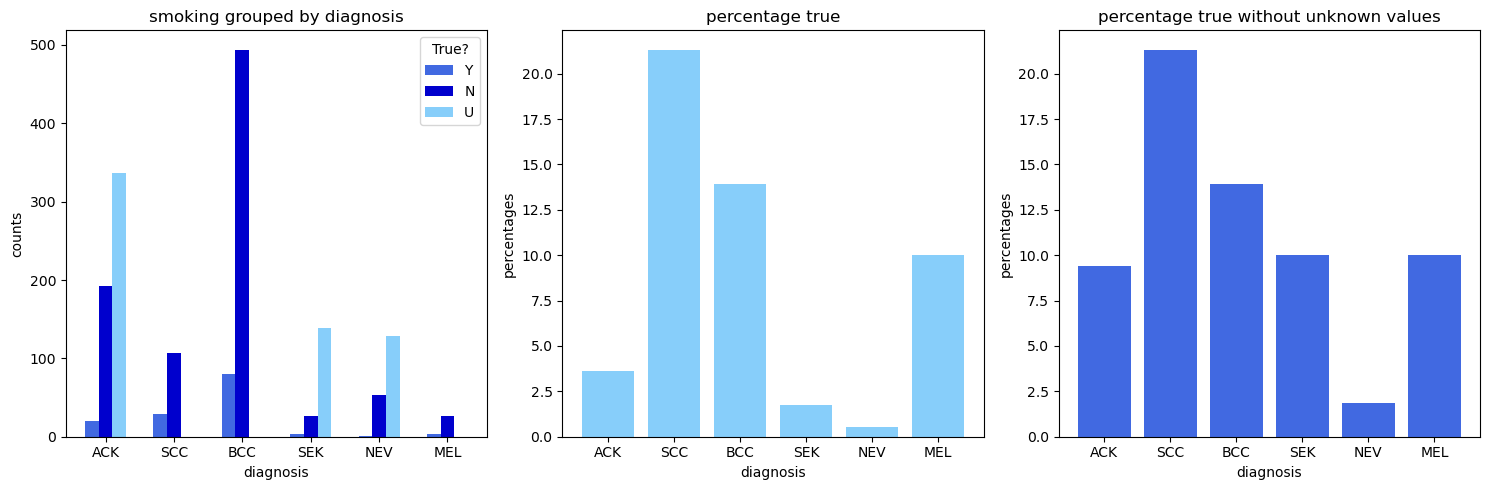

In [10]:
data_analysis_plot(mel, nev, ack, sek, bcc, scc, "smoke", "smoking grouped by diagnosis")

Drinking

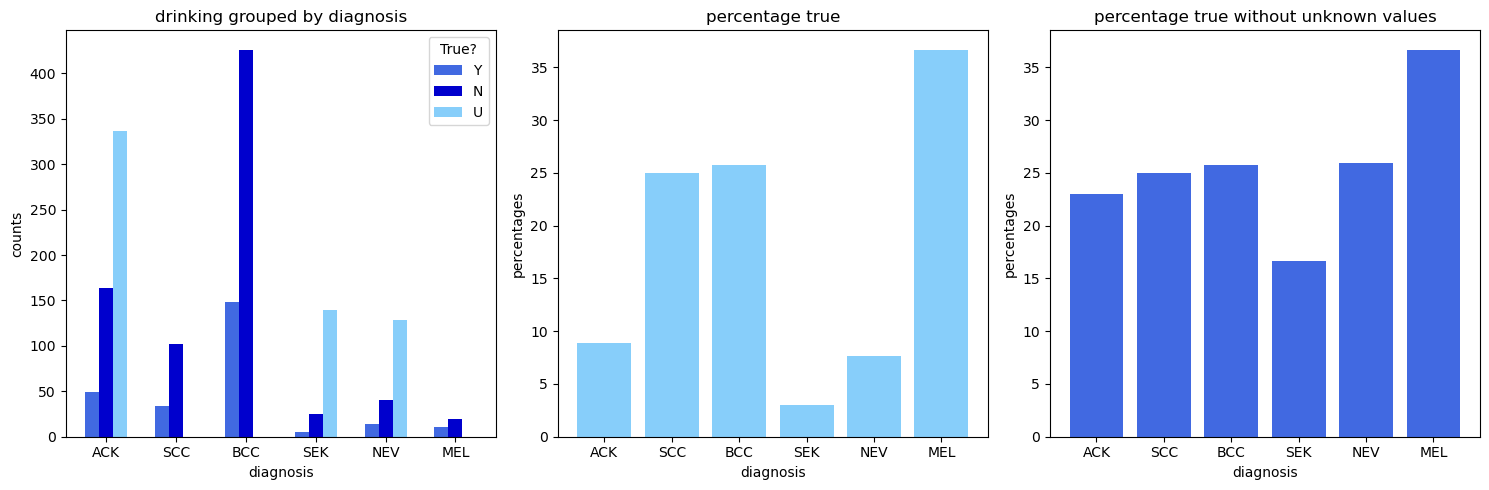

In [11]:
data_analysis_plot(mel, nev, ack, sek, bcc, scc, "drink", "drinking grouped by diagnosis")

Pesticides

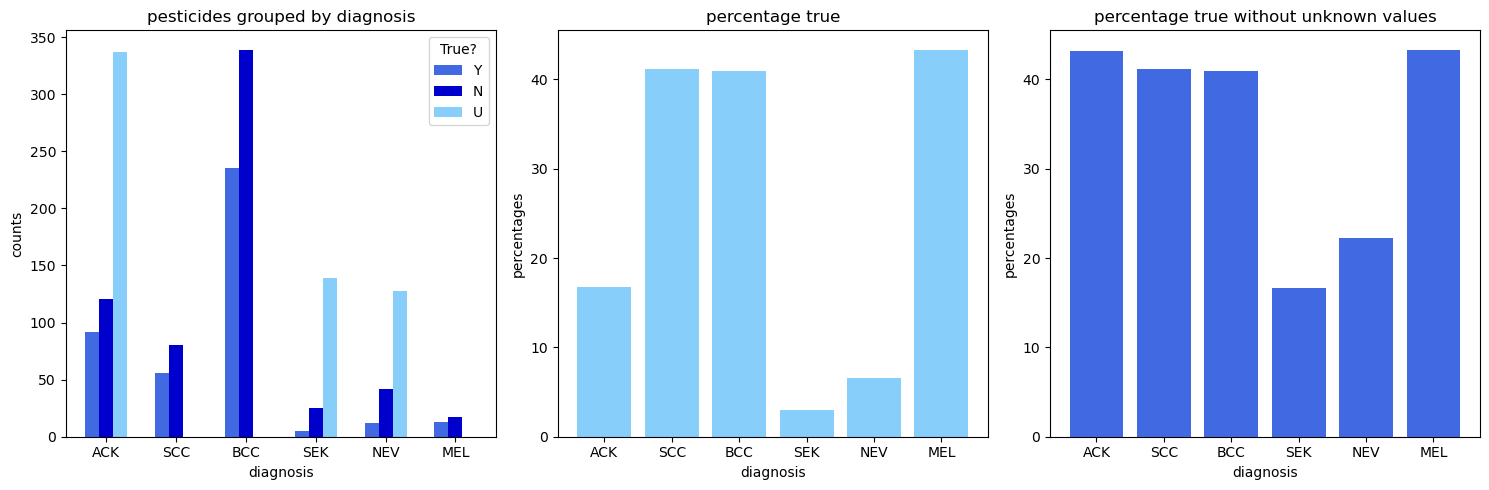

In [12]:
data_analysis_plot(mel, nev, ack, sek, bcc, scc, "pesticide", "pesticides grouped by diagnosis")

Skin Cancer History

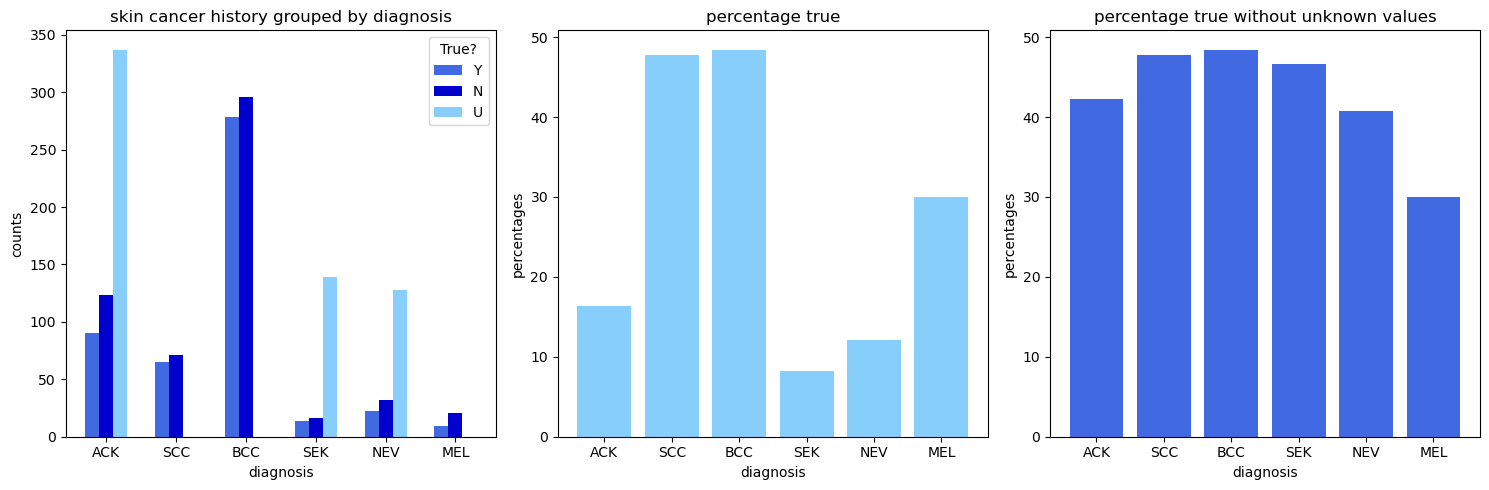

In [13]:
data_analysis_plot(mel, nev, ack, sek, bcc, scc, "skin_cancer_history", "skin cancer history grouped by diagnosis")

Cancer History

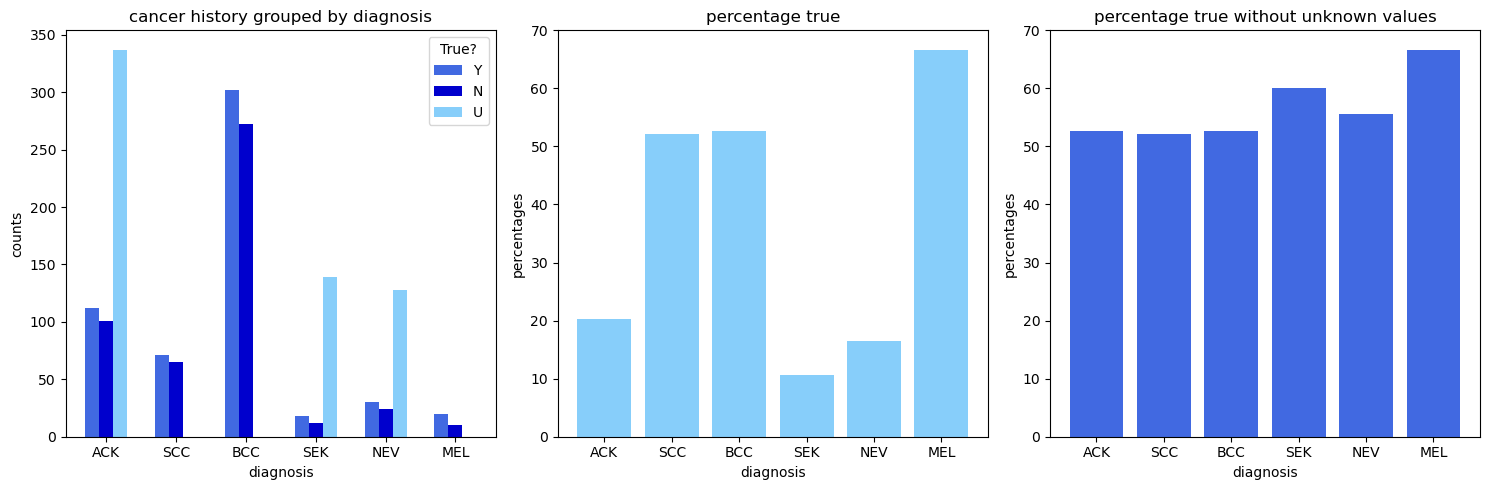

In [14]:
data_analysis_plot(mel, nev, ack, sek, bcc, scc, "cancer_history", "cancer history grouped by diagnosis")

Piped Water

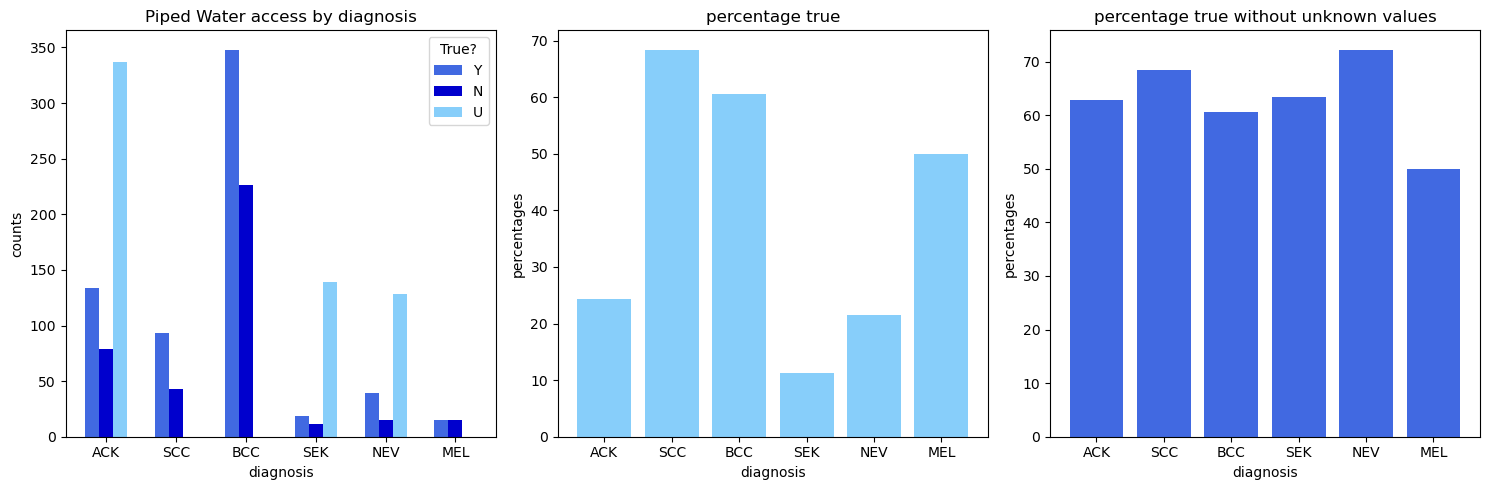

In [15]:
data_analysis_plot(mel, nev, ack, sek, bcc, scc, "has_piped_water", "Piped Water access by diagnosis")

Sewage System

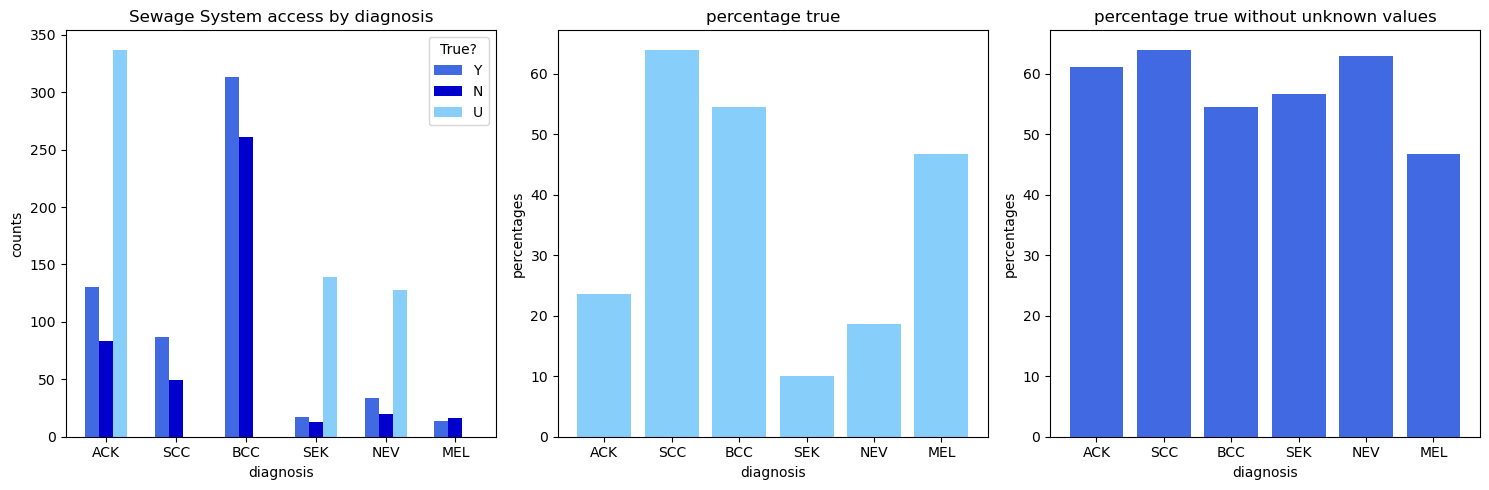

In [16]:
data_analysis_plot(mel, nev, ack, sek, bcc, scc, "has_sewage_system", "Sewage System access by diagnosis")

Parental Backgrounds

In [17]:
def origin(dataset, column_name: str):
    countries = ["POMERANIA", "GERMANY", "ITALY", "UNK", "BRAZIL", "NETHERLANDS",
    "PORTUGAL", "POLAND", "BRASIL", "CZECH", "AUSTRIA", "SPAIN", "ISRAEL", "NORWAY", "FRANCE"]
    counts = []
    for cn in countries:
        count = len(dataset[dataset[column_name]==cn])
        if cn == "BRASIL": #combining "Brazil" and "Brasil", since they're the same country
            counts[4][1] += count
            continue
        elif cn == "UNK":
            continue #skips unknown, because this doesn't give us any relevant information
        country_count = [cn, count]  
        counts.append(country_count)

    return counts     

In [19]:
datasets = [ack, scc, bcc, sek, nev, mel]
#background father
cleaned_data_f = []
for s in datasets:
    cleaned_data_f.append(clean(s, "background_father"))

values_f = {"ACK": None,
        "BCC": None,
        "SCC": None,
        "SEK": None,
        "NEV": None,
        "MEL": None
}

values_list = list(values_f)

for i in range(len(values_list)):
    cnts = origin(cleaned_data_f[i], "background_father") #getting the list of counts for that dataset
    values_f[values_list[i]] = [x/len(cleaned_data_f[i])*100 for c,x in cnts] #saving the list in the dict

#background mother
cleaned_data_m = []
for s in datasets:
    cleaned_data_m.append(clean(s, "background_mother"))

values_m = {"ACK": None,
        "BCC": None,
        "SCC": None,
        "SEK": None,
        "NEV": None,
        "MEL": None
}

for i in range(len(values_list)):
    cnts = origin(cleaned_data_m[i], "background_mother") #getting the list of counts for that dataset
    values_m[values_list[i]] = [x/len(cleaned_data_m[i])*100 for c,x in cnts] #saving the list in the dict

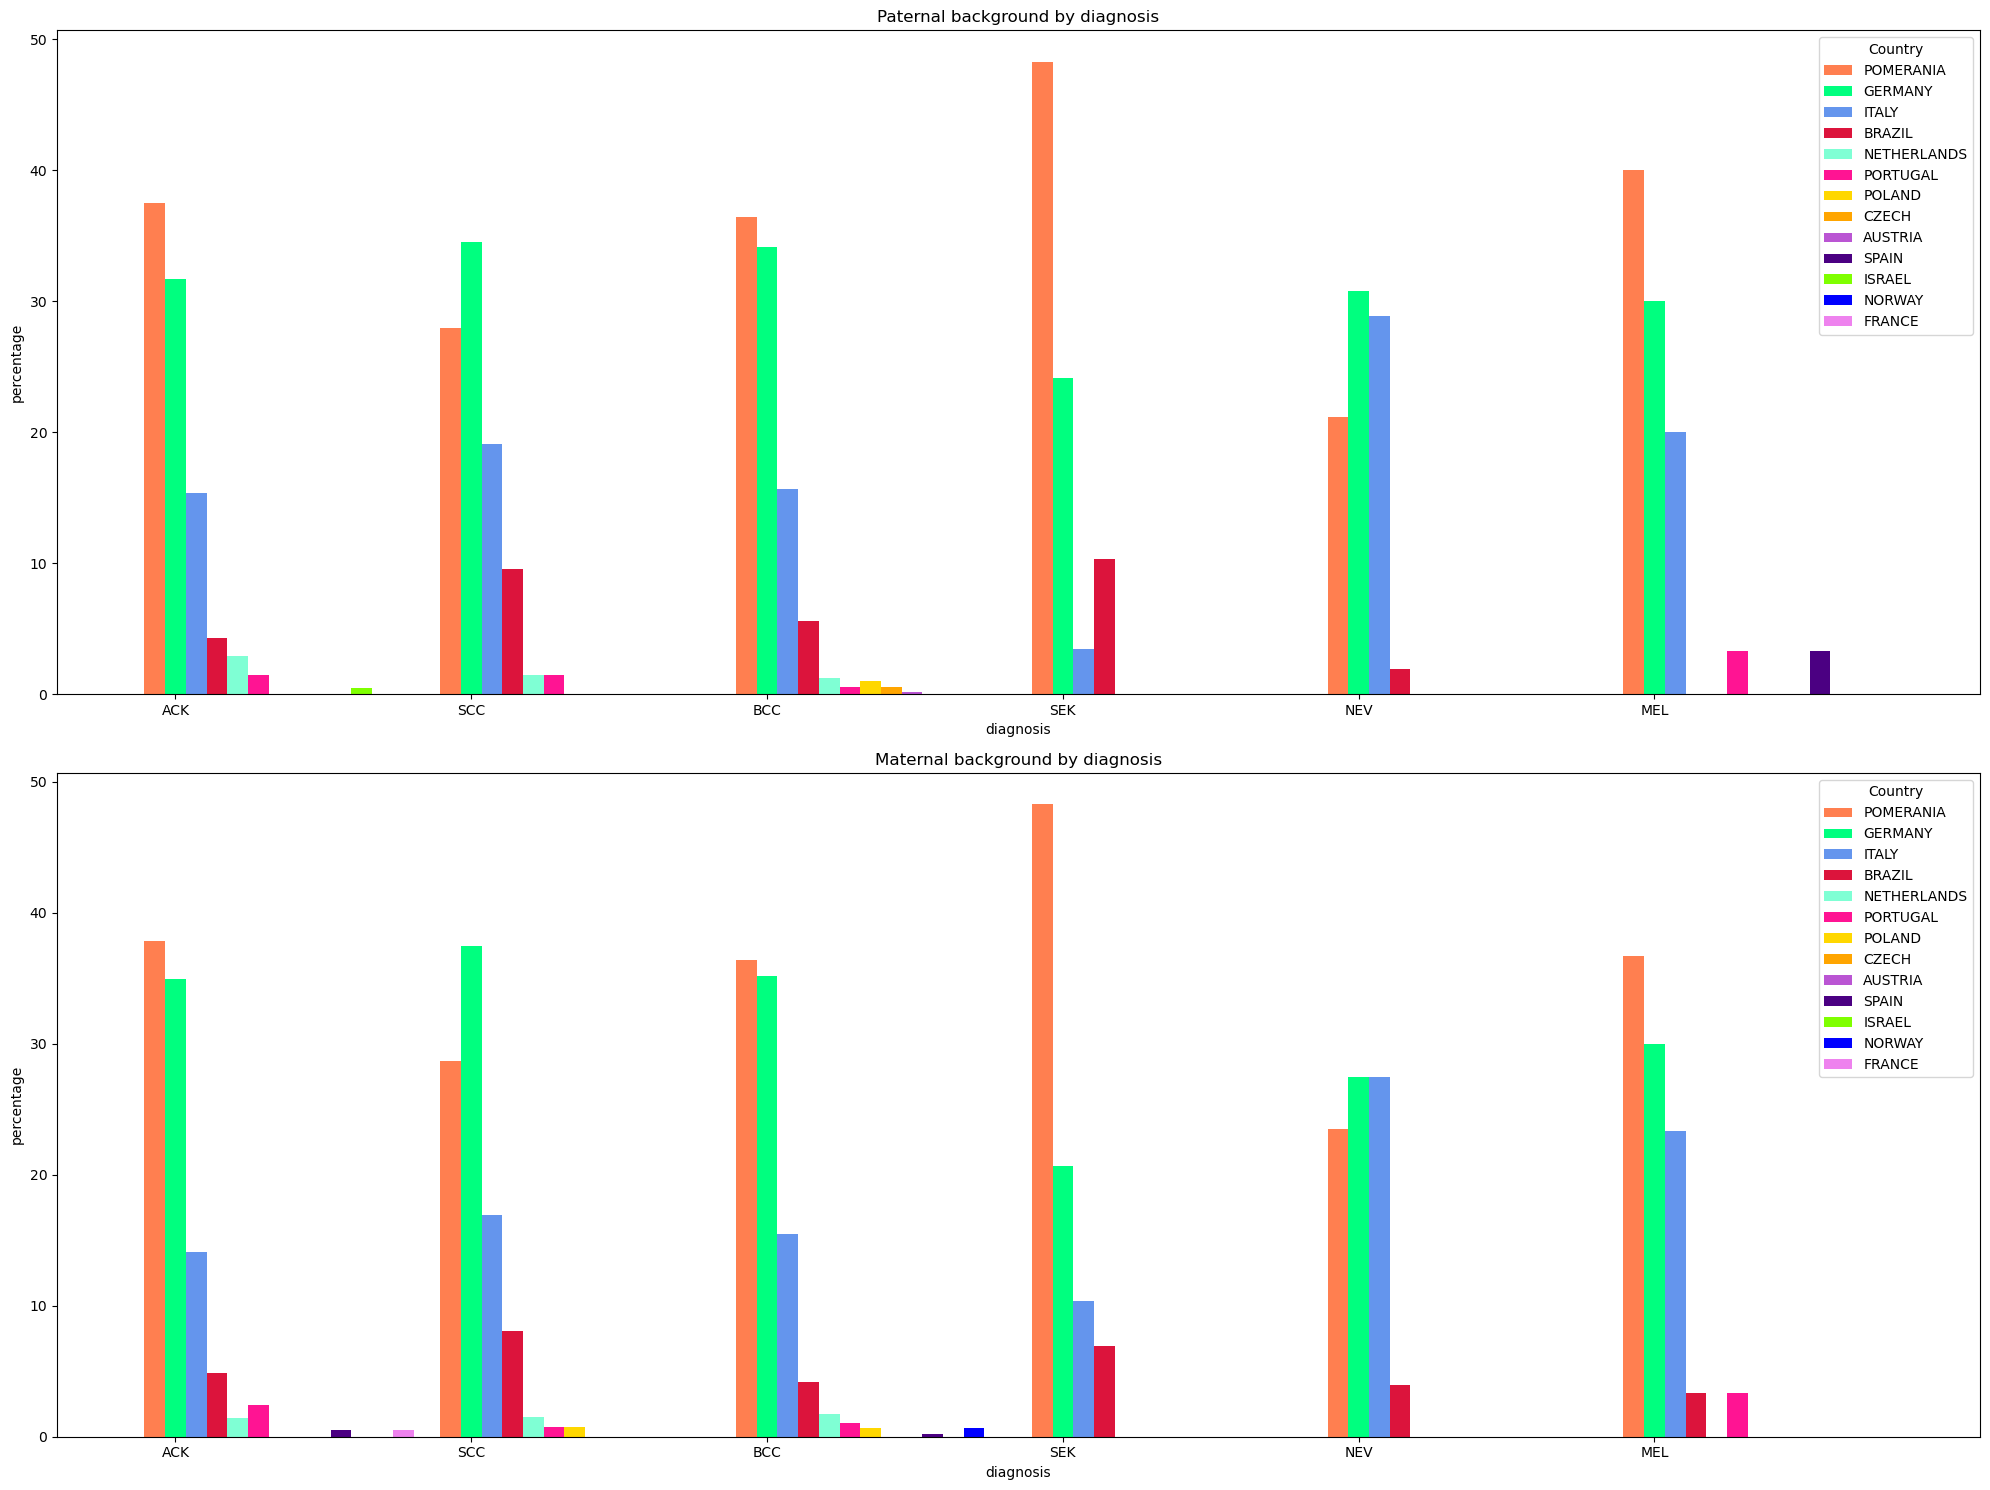

In [21]:
countries = ["POMERANIA", "GERMANY", "ITALY", "BRAZIL", "NETHERLANDS",
    "PORTUGAL", "POLAND", "CZECH", "AUSTRIA", "SPAIN", "ISRAEL", "NORWAY", "FRANCE"]

plotcolors = ["coral", "springgreen", "cornflowerblue", "crimson", "aquamarine", "deeppink",
              "gold", "orange", "mediumorchid", "indigo", "chartreuse", "blue", "violet"]

categories = ["ACK", "SCC", "BCC", "SEK", "NEV", "MEL"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

ax1 = axes[0]
bar_width = 0.07
index = np.arange(len(values_list))

for i, sc in enumerate(countries):
    heights = [values_f[s][i] for s in values_list]
    ax1.bar(index + i * bar_width, heights, bar_width, label=sc, color = plotcolors[i])

ax1.set_xlabel("diagnosis")
ax1.set_ylabel("percentage")
ax1.set_title("Paternal background by diagnosis")
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories)
ax1.legend(title = "Country")

ax2 = axes[1]
bar_width = 0.07
index = np.arange(len(values_list))

for i, sc in enumerate(countries):
    heights = [values_m[s][i] for s in values_list]
    ax2.bar(index + i * bar_width, heights, bar_width, label=sc, color = plotcolors[i])

ax2.set_xlabel("diagnosis")
ax2.set_ylabel("percentage")
ax2.set_title("Maternal background by diagnosis")
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(categories)
ax2.legend(title = "Country")


plt.tight_layout()
plt.show()

Gender

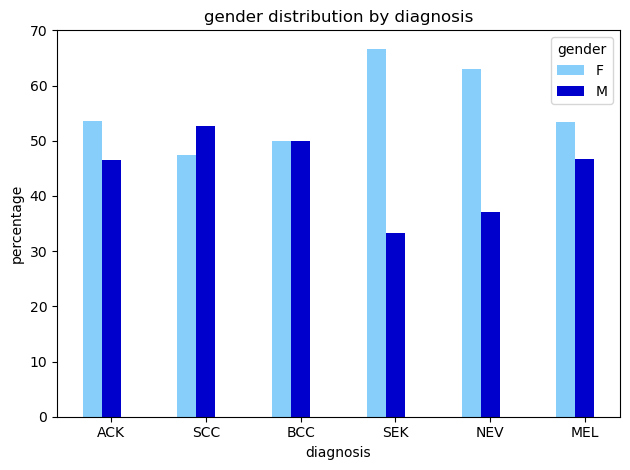

In [22]:
datasets = [ack, scc, bcc, sek, nev, mel]

values = {"ACK": None,
    "SCC": None,
    "BCC": None,
    "SEK": None,
    "NEV": None,
    "MEL": None}

categories = list(values)

for i, d in enumerate(datasets):
    females_count = len(d[d["gender"]=="FEMALE"])
    males_count = len(d[d["gender"]=="MALE"])
    unknown = len(d) - (females_count + males_count)
    unknown_removed = len(d) - unknown
    f_p = females_count/unknown_removed*100
    m_p = males_count/unknown_removed*100
    mf_percentages = [f_p, m_p]
    values[values_list[i]] = mf_percentages

gender = ["F", "M"]

bar_width = 0.2
index = np.arange(len(categories))
colors = ["lightskyblue", "mediumblue"]

for i, g in enumerate(gender):
    heights = [values[c][i] for c in categories]
    plt.bar(index + i * bar_width, heights, bar_width, label=g, color = colors[i])

plt.xlabel("diagnosis")
plt.ylabel("percentage")
plt.title("gender distribution by diagnosis")
plt.xticks(index + bar_width, categories)
plt.legend(title="gender")
plt.tight_layout()
plt.show()

Fitzpatrick

In [23]:
def fitspatrick(dataset, column_name):
    scores = [1,2,3,4,5,6]
    counts = []
    for s in scores:
        count = len(dataset[dataset[column_name]==s])
        score_count = [s, count]  
        counts.append(score_count)

    return counts 

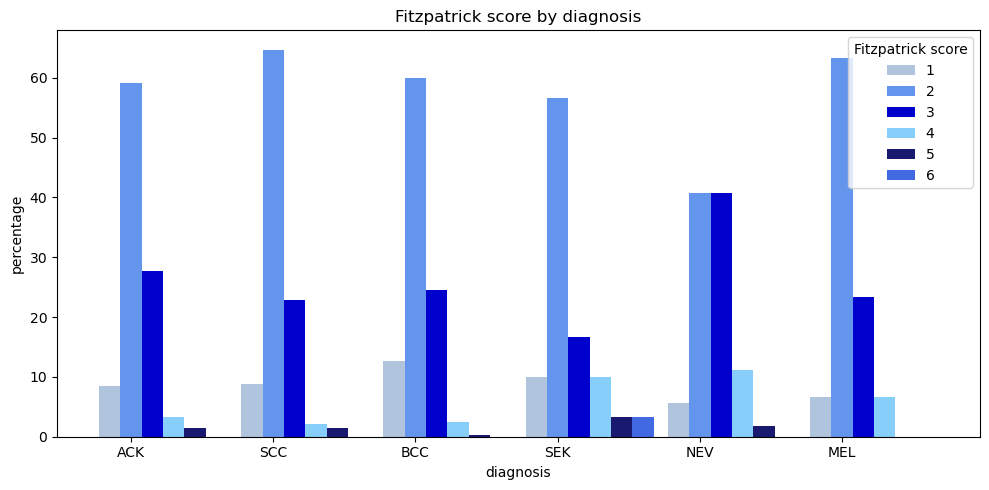

In [27]:
datasets = [ack, scc, bcc, sek, nev, mel]
cleaned_datasets = []
for i in datasets: #removing data with no fitspatrick score
    cl = clean(i, "fitspatrick")
    cleaned_datasets.append(cl)

values_fitspatrick = {"ACK": None,
        "BCC": None,
        "SCC": None,
        "SEK": None,
        "NEV": None,
        "MEL": None
}

values_list = list(values_fitspatrick)

for i in range(len(values_list)):
    f = fitspatrick(cleaned_datasets[i], "fitspatrick")
    values_fitspatrick[values_list[i]] = [x/(len(cleaned_datasets[i]))*100 for s,x in f] #saving the percentages in dictionary

scores = [1,2,3,4,5,6]
pltclrs = ["lightsteelblue", "cornflowerblue", "mediumblue", "lightskyblue", "midnightblue", "royalblue"]

bar_width = 0.15
index = np.arange(len(categories))

plt.figure(figsize = (10,5))
for i, g in enumerate(scores):
    heights = [values_fitspatrick[c][i] for c in values_list]
    plt.bar(index + i * bar_width, heights, bar_width, label=g, color = pltclrs[i])

plt.xlabel("diagnosis")
plt.ylabel("percentage")
plt.title("Fitzpatrick score by diagnosis")
plt.xticks(index + bar_width, categories)
plt.legend(title="Fitzpatrick score")
plt.tight_layout()
plt.show()
